## Copyright [2025] [Indian Institute of Science, Bengaluru]
## SPDX-License-Identifier: Apache-2.0

## Experiment 3 : IEEE WLAN 802.11ax PHY frame format


### *1. Learning objectives*

• Features of IEEE 802.11ax

• HE PPDU frame format

• Legacy part of the preamble

• HE- SIG fileds

• Plot of L-LTF field of the preamble of 11ax


### *2. Theory*

#### • IEEE 802.11ax (Wi-Fi 6)

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 8px;"></p>
    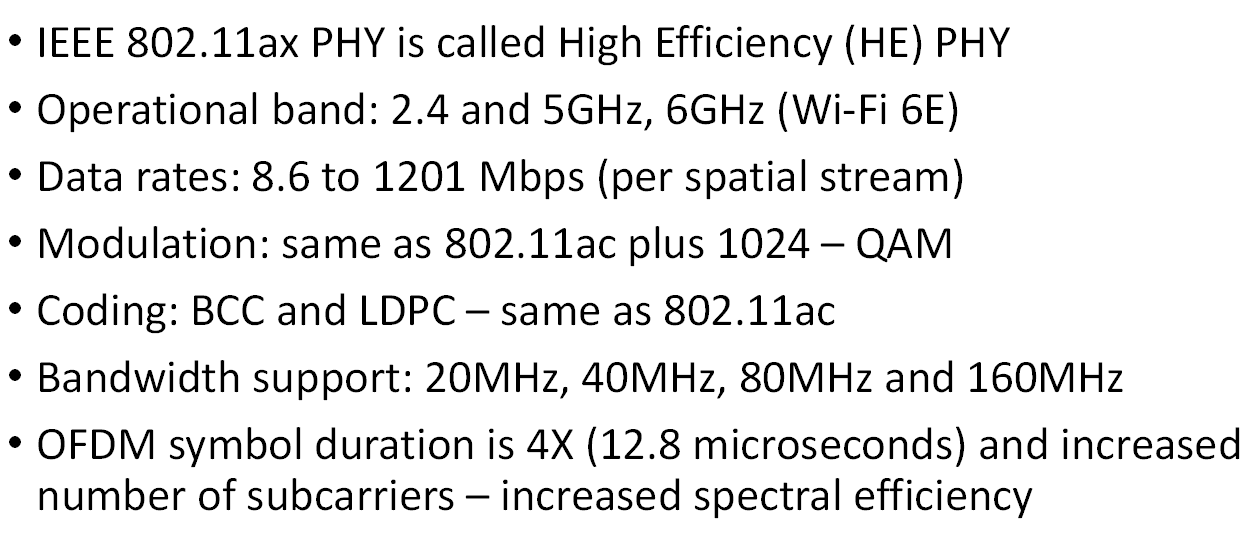
</div>


#### • HE PPDU Formats

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;"></p>
    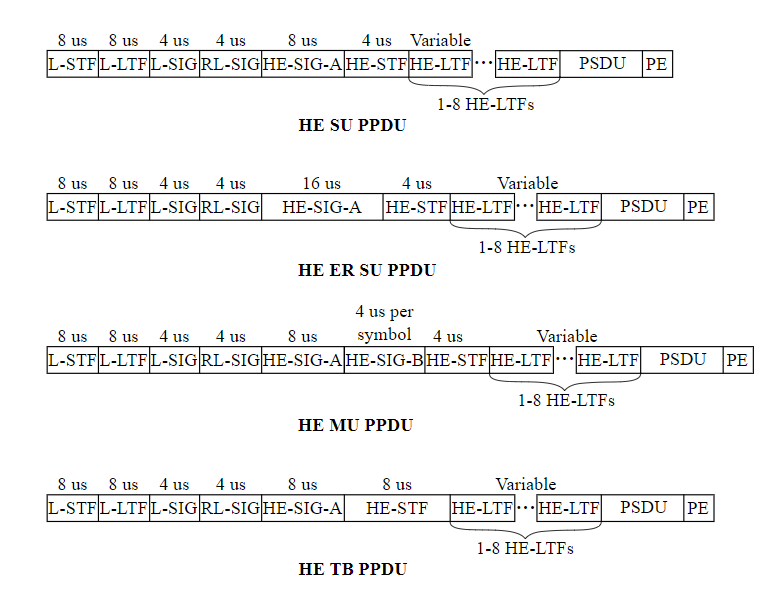
</div>


#### • HE PPDU Field Abbreviation

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;"></p>
    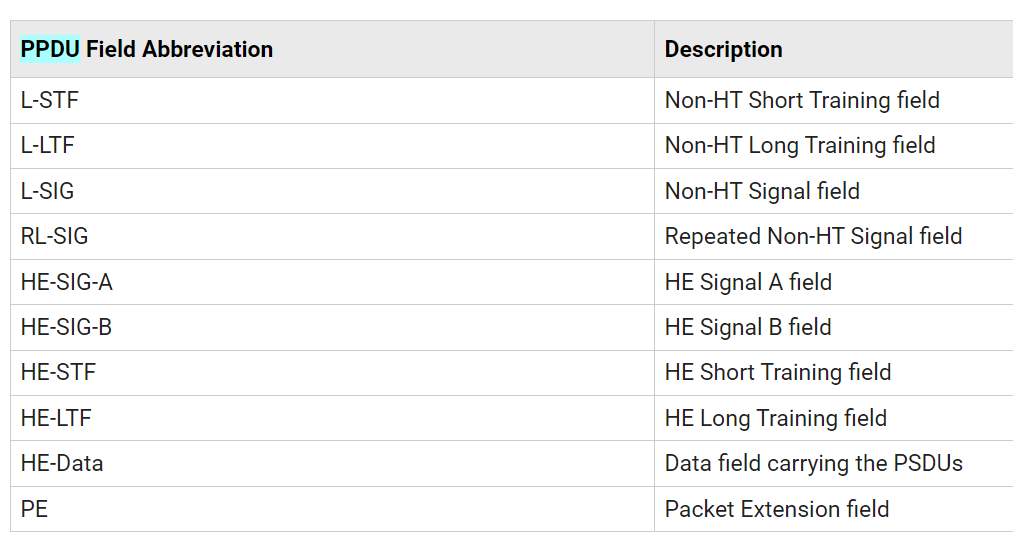
</div>


#### • HE-SIG

• OFDM symbol duration for fields before HE-LTF is 3.2 μs, while it is 12.8 μs for HE-LTF and PSDU.

• The HE-SIG-B has variable number of OFDM symbols and it is sent as SU Tx before the HE-LTFs. It includes the MCS information for each STA.

• HE-SIG-B has common field and user-specific field.

• GI and LTF size specified in HE-SIG-A field.

#### • HE GI and LTF Options

<div style="text-align: center;">
    <p style="font-weight: bold; font-size: 16px;"></p>
    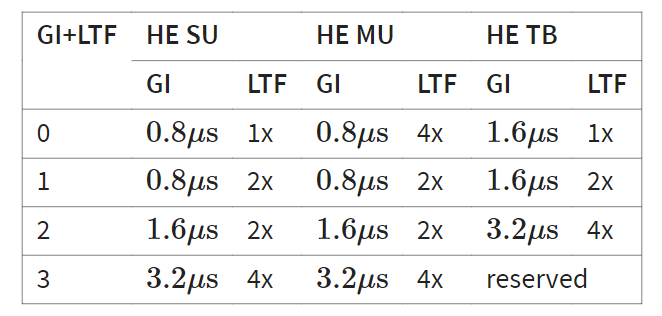
</div>


### *Note: For better clarity, watch [IEEE WLAN 802.11ax PHY frame format](https://www.youtube.com/watch?v=H8Zq5elPHWo&list=PLNN9TCnjABcYHR9XRiQitBCHJUeT_58QG&index=5&t=3s) on CNI YouTube channel*

### *4. Code*

In [4]:
% To plot HE-LTF field of the packet preamble

clc;close all;
clear all;
cfgSU = wlanHESUConfig; %wlanHESUConfig creates a single user (SU) high efficiency (HE)format configuration object. 
%This object contains the transmit parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.
cfgSU.ChannelBandwidth='CBW20';
% 'CBW20' | 'CBW40' |'CBW80' (default) | 'CBW160' | 'CBW320'
cfgSU.MCS = 0;   %BPSK Modulation and coding rate = 1/2. 
cfgSU.HELTFType =1;% 1x HE-LTF, 2x HE-LTF, and 4x HE-LTF, 
%with symbol duration of 3.2, 6.4, and 12.8 µs, respectively.
cfgSU.GuardInterval = 0.8; % 0.8, 1.6, 3.2 µs
cfgSU.APEPLength=100;% Data field carry PSDU's. Specify PSDU length
%Produce a waveform containing an 802.11ax HE single user packet 
%WAVEFORM is a complex Ns-by-Nt matrix containing the generated waveform, where
% Ns is the number of time domain samples, Nt is the number of transmitting antennas

wlanHESUConfig creates a single user (SU) high-efficiency (HE)format configuration object is created. This object contains the transmit parameters for the HE-SU format of IEEE P802.11ax/D3.1 standard.

cfgSU.ChannelBandwidth: This parameter sets the channel bandwidth to 'CBW20', indicating a channel bandwidth of 20 MHz.

cfgSU.MCS: This parameter sets the Modulation and Coding Scheme (MCS) to 0, typically corresponding to BPSK modulation with a coding rate of 1/2. MCS values determine the modulation scheme and coding rate used for data transmission.

cfgSU.HELTFType: This parameter sets the High Efficiency-Long Training Field (HE-LTF) type to 1, indicating 1x HE-LTF. HE-LTFs are used for channel estimation and equalization in 802.11ax.

cfgSU.GuardInterval: This parameter sets the guard interval to 0.8 microseconds. The guard interval (also known as the cyclic prefix) is inserted between symbols to mitigate the effects of multipath propagation.

cfgSU.APEPLength: This parameter sets the length of the A-MPDU (Aggregate MAC Protocol Data Unit) payload to 100 bytes. A-MPDU is used to carry PSDUs (Physical Layer Protocol Data Units). The PSDU length is specified here.

These parameters configure the transmission parameters for the single-user HE format in the IEEE 802.11ax standard. They specify how data is modulated, encoded, and transmitted over the wireless channel.


In [5]:
% Configure a TGax channel with 20 MHz bandwidth.
tgax = wlanTGaxChannel('ChannelBandwidth','CBW20');
tgax.CarrierFrequency=2.4e9; %default is 5.25GHz 
stream = RandStream('combRecursive','Seed',99);
RandStream.setGlobalStream(stream);
tgax.SampleRate = 100e6;
tgax.PathGainsOutputPort = true;
tgax.DelayProfile='Model-B';
tgax.LargeScaleFadingEffect = 'PathLoss';
tgax.TransmitReceiveDistance=10;% in meters, breakpoint distance that obeys freespace pathloss model for Model B is 5m
info_tgax=info(tgax)


info_tgax = 

  struct with fields:

           ChannelFilterDelay: 0
    ChannelFilterCoefficients: [9x9 double]
                   PathDelays: [0 1.0000e-08 2.0000e-08 3.0000e-08 4.0000e-08 5.0000e-08 6.0000e-08 7.0000e-08 8.0000e-08]
             AveragePathGains: [0 -5.4287 -2.5162 -5.8905 -9.1603 -12.5105 -15.6126 -18.7147 -21.8168]
                     Pathloss: 64.5614




After setting the transmission parameters, we configure a tgaxChannel channel with 20 MHz bandwidth. The carrier frequency by default is 5.25GHz, but we have set it to 2.4GHz. The sample rate is set. The PathGainOutputPort is set to true so that you get the channel Path gains to plot the impulse response.  The Delay profile is chosen as Model B, Indoor residential. The large-scale fading effect is set to "pathloss". Note that the distance between the transmitter and receiver is 10m (NLOS). 

You have an info(tgax), which gives information about channel filter coefficients, Pathgains, and Pathloss information.

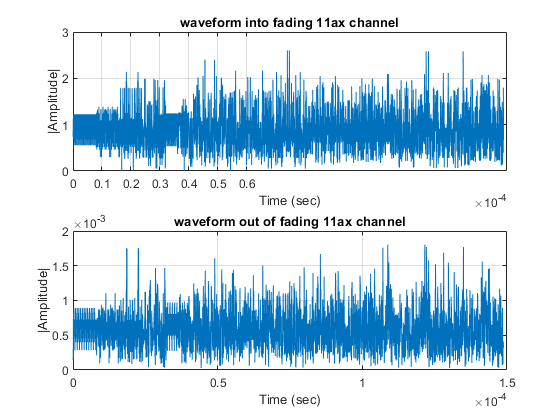

In [6]:
chanBW = cfgSU.ChannelBandwidth;%default 20MHz channel
psdu = randi([0 1], getPSDULength(cfgSU)*8, 1); % Create a PSDU, getPSDULength(cfgSU)=100 bytes
txWaveform = wlanWaveformGenerator(psdu,cfgSU);
sr= wlanSampleRate(cfgSU);
% Pass through a fading indoor TGax channel
[tgax_output,pathgains] = tgax(txWaveform);%% note Pathgains are independent of the input signal(values or the number of samples Ns) and depends only on the propagation MOdel:
figure(1)
tt=1:length(txWaveform);
subplot(2,1,1)
plot((tt/sr),abs(txWaveform));grid on;
xticks([0 10 20 30 40 50 60]*1e-6);
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('waveform into fading 11ax channel'); 
subplot(2,1,2)
plot((tt/20e6),abs(tgax_output));grid on;
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('waveform out of fading 11ax channel'); 


Create a PSDU, getPSDULength(cfgSU)=100 bytes to generate a waveform containing an 802.11ax HE single-user packet. Now, the data Packet has been generated using the random number of bit patterns, and this packet, which consists of ones and zeroes, has to be converted into waveform before passing it to the channel. 

The waveform generation is done using a WLAN waveform generator, which accepts the data bit pattern and configuration object, and the tx waveform is created. The generated waveform is a complex Ns-by-Nt matrix where Ns is the number of time domain samples, and Nt is the number of transmitting antennas. Since it is a SISO configuration, what we are doing is Nt will be equal to 1, and the Tx waveform will be a column vector. Pass through a fading indoor tgaxChannel channel.

Pathgains are independent of the input signal (values or the number of samples Ns) and depend only on the propagation Model. The input waveform to the 11ax channel and the faded waveform from the 11ax channel are plotted.



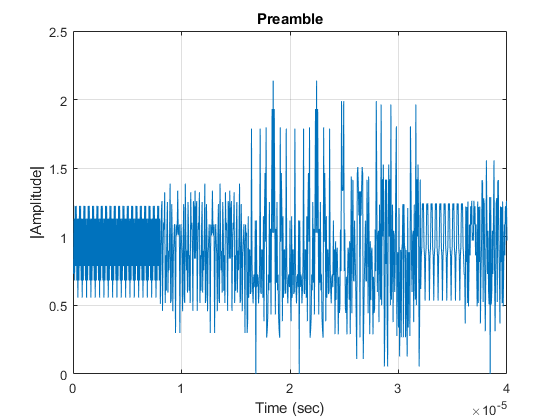

In [7]:
ind=wlanFieldIndices(cfgSU);
figure(2)
preamble=txWaveform((ind.LSTF(1):ind.HELTF(2)));
tt1=1:length(preamble);
plot((tt1/20e6),abs(preamble));grid on;
xticks([0 10 20 30 40]*1e-6);
xlabel('Time (sec)');
ylabel('|Amplitude|');
title('Preamble'); ('dB');



The wlanfieldIndices gives different index points for different fields within the packet.This code first obtains the WLAN field indices using the wlanFieldIndices function. Then, it extracts the preamble from the transmitted waveform txWaveform using the obtained indices. After generating the time vector for plotting, it plots the absolute values of the preamble against time. The x-axis ticks are set to specific values, and appropriate labels and titles are added to the plot.

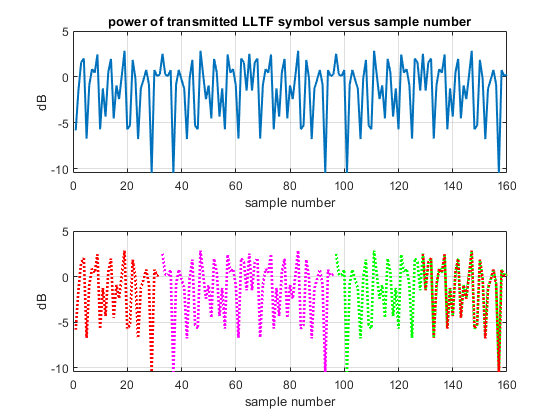

In [8]:
LLTF_transmitted = txWaveform((ind.LLTF(1):ind.LLTF(2)), :);
a11=[ LLTF_transmitted(33:96) LLTF_transmitted(97:160)];
% LLTF1 (64 samples) and LLTF2 (64 samples) are same
a22=[ LLTF_transmitted(1:32) LLTF_transmitted(129:160)];
% Cyclic prefix and second half of LLTF2 are same
figure(3);
subplot(2,1,1)
plot(20*log10(abs(LLTF_transmitted)),'LineWidth',1.5);grid on;
title('power of transmitted LLTF symbol versus sample number')
xlabel('sample number');
ylabel('dB');
subplot(2,1,2)
plot((1:32),20*log10(abs(LLTF_transmitted(1:32))), 'r:','LineWidth',2);hold on;grid on;
plot((33:96),20*log10(abs(LLTF_transmitted(33:96))), 'm:','LineWidth',2);hold on;
plot((97:160),20*log10(abs(LLTF_transmitted(97:160))), 'g:','LineWidth',2);hold on;
plot((129:160),20*log10(abs(LLTF_transmitted(129:160))), 'r:','LineWidth',2);hold on;
xlabel('sample number');
ylabel('dB');

The power of the transmitted LLTF symbol versus the sample number is plotted. Please see the recording [IEEE WLAN 802.11ax PHY frame format](https://www.youtube.com/watch?v=H8Zq5elPHWo&list=PLNN9TCnjABcYHR9XRiQitBCHJUeT_58QG&index=5&t=3s) for a detailed plot explanation.